In [2]:
# Basic Settings

import pandas as pd
import numpy as np
import warnings
import IPython.display
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# load datasets

# First Dataset : Tw text Dataset
tw_df_origin = pd.read_csv('data/tw_data.csv')

# Second Dataset : Wiki Pedia Dataset
wiki_df_origin = pd.read_csv('data/wiki_train.csv').drop(columns='id')

In [4]:
# pre-process for merging two DFs

# Pre-processing TW_df
tw_texts = tw_df_origin['tweet']\
            .map(lambda x : re.sub(r'.+! RT.', '', x).strip())\
            .to_frame().rename(columns={'tweet': 'text'})
tw_labels = tw_df_origin['class']\
            .map(lambda x : 0 if x == 2 else 1)\
            .to_frame().rename(columns={'class':'label'})

# Pre-processing Wiki_df
wiki_texts = wiki_df_origin['comment_text']\
            .to_frame().rename(columns={'comment_text':'text'})
wiki_labels = wiki_df_origin.iloc[:, 1:].sum(axis=1)\
            .map(lambda x : 1 if x > 0 else 0).to_frame()\
            .rename(columns={0:'label'})

In [5]:
# Merging Two DFs

tw_df = pd.concat([tw_texts, tw_labels], axis=1)
wiki_df = pd.concat([wiki_texts, wiki_labels], axis=1)

display(tw_df.head())
display(wiki_df.head())

,text,label
0,@mayasolovely: As a woman you shouldn't compla...,0
1,@mleew17: boy dats cold...tyga dwn bad for cuf...,1
2,@80sbaby4life: You ever fuck a bitch and she s...,1
3,@C_G_Anderson: @viva_based she look like a tranny,1
4,@ShenikaRoberts: The shit you hear about me mi...,1


,text,label
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [6]:
text_df = pd.concat([wiki_df, tw_df]).drop(columns='label')
label_df = pd.concat([wiki_df, tw_df]).drop(columns='text')

In [7]:
from d_pre import tokenize

token_words = tokenize(text_df)
token_words

,text
0,"[explanation, edits, made, username, hardcore,..."
1,"[aww, match, background, colour, seemingly, st..."
2,"[hey, man, really, trying, edit, war, guy, con..."
3,"[make, real, suggestion, improvement, wondered..."
4,"[sir, hero, chance, remember, page]"
...,...
24778,"[muthaf, lie, lifeasking, pearl, corey, emanue..."
24779,"[gone, broke, wrong, heart, baby, drove, redne..."
24780,"[young, buck, wanna, eat, dat, nigguh, like, a..."
24781,"[youu, got, wild, bitch, tellin, lie]"


In [8]:
w_df = pd.concat([token_words, label_df], axis=1)

In [9]:
# Train Test Split

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.15

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(w_df['text'], 
                                                    w_df['label'], 
                                                    test_size=1-train_ratio, 
                                                    stratify=w_df['label'], 
                                                    random_state=42)

# Validation Test Split
X_val, X_test, y_val, y_test = train_test_split(X_test, 
                                                y_test, 
                                                test_size=test_ratio / (test_ratio + val_ratio), 
                                                stratify=y_test, 
                                                random_state=42)

In [32]:
# Train Test Split

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(w_df['text'], 
                                                    w_df['label'], 
                                                    test_size=0.2, 
                                                    stratify=w_df['label'], 
                                                    random_state=42)

In [33]:
from gensim.models import Word2Vec

num_features = 100

emb_model = Word2Vec(X_train, 
                     size=num_features, 
                     iter=100, 
                     window=10, 
                     min_count=300, 
                     seed=42,
                     sample=1e-3, 
                     workers=-1, 
                     sg=1)

emb_model.init_sims(replace=True)

In [34]:
emb_model.wv.doesnt_match('man woman child'.split())

'child'

In [35]:

target_word = 'english'
similar_words = emb_model.most_similar(target_word, topn=10)

In [36]:
text = ' '.join([word[0] for word in similar_words])
text

'de immediately animal negative manual new british dr abuse notable'

In [37]:
from wordcloud import WordCloud, ImageColorGenerator

wordcloud = WordCloud(max_font_size=40, background_color='white').generate(text)

In [31]:
wordcloud.to_file("first_test.png")

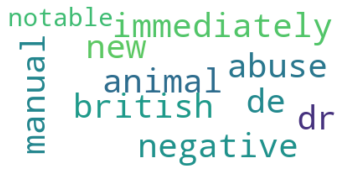

In [38]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
import joblib

joblib.dump(emb_model, 'emb_model')

['emb_model']